# Projet 4 - Segmentez des clients d'un site e-commerce

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

In [2]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importation du jeu de données
df = pd.read_csv('data/customer_segments2_202402160948.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_unique_id       96096 non-null  object 
 1   total_orders             96096 non-null  int64  
 2   avg_delivery_time_days   93356 non-null  float64
 3   last_order_date          96096 non-null  object 
 4   days_since_last_order    96096 non-null  float64
 5   total_spent              95420 non-null  float64
 6   avg_review_score         95380 non-null  float64
 7   total_payments_received  96095 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.9+ MB


Le jeu initial de données contient 3376 observations réparties en 46 colonnes/variables.

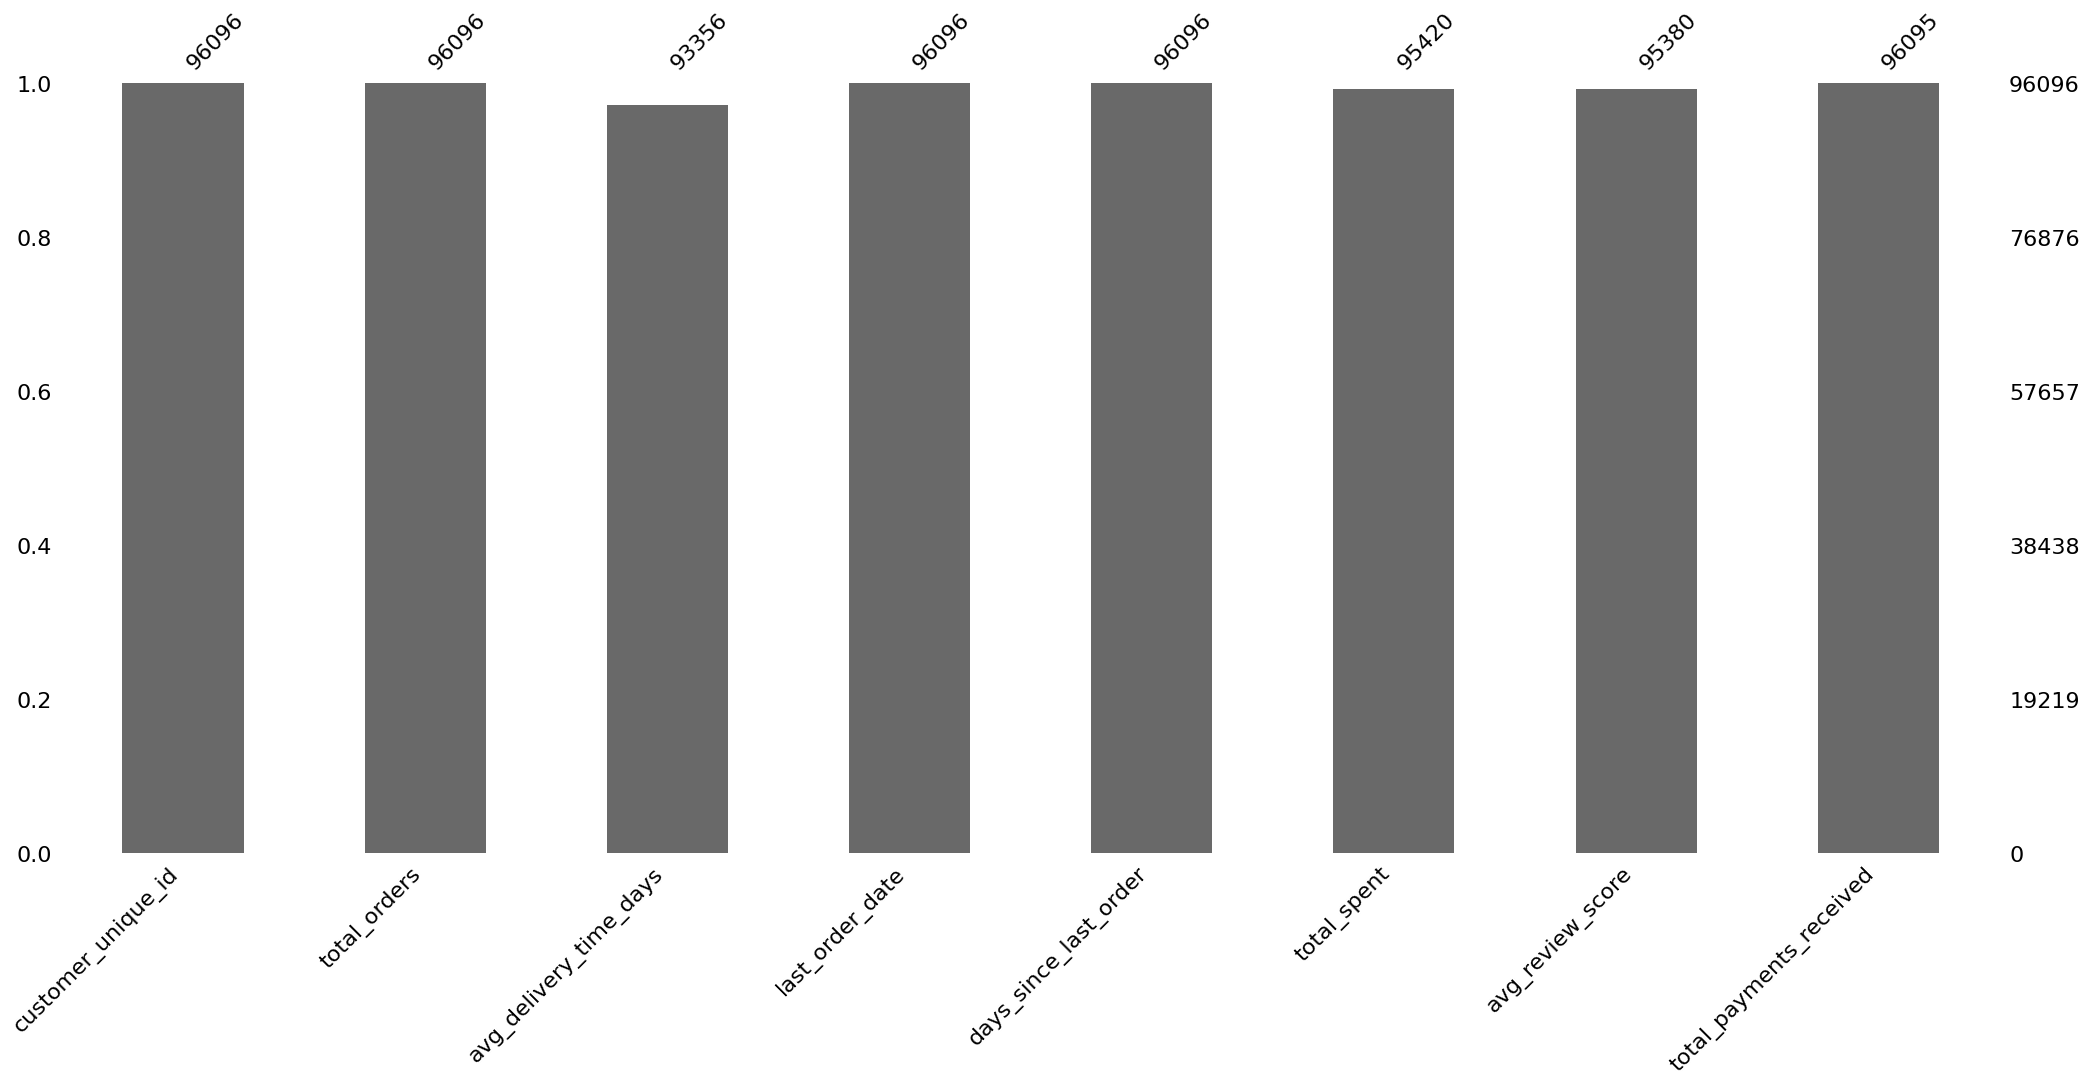

In [5]:
DataAnalysis.show_columns_population(df, type='bar')

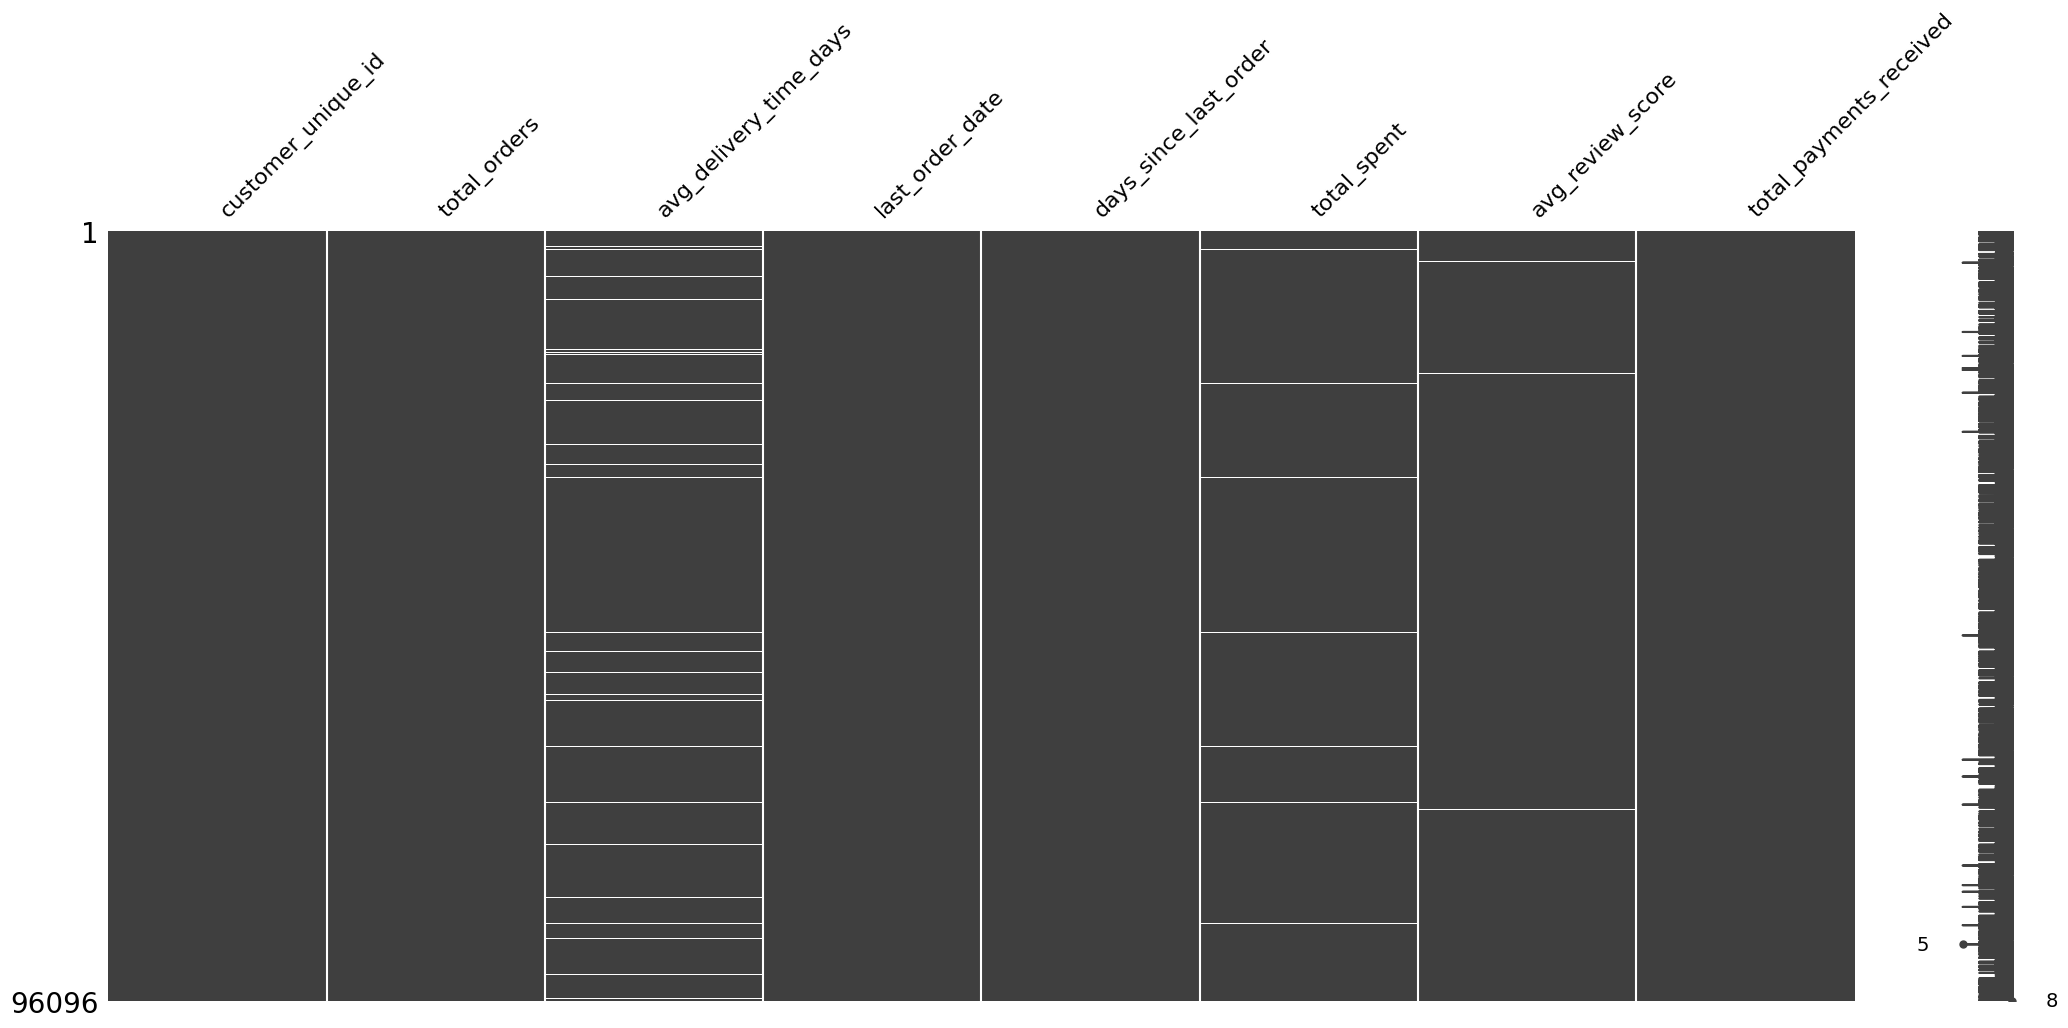

In [7]:
DataAnalysis.show_columns_population(df, type='matrix')

In [8]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,total_payments_received
count,96096.000000,93356.000000,96096.000000,95420.000000,95380.000000,96095.000000
mean,1.034809,12.566675,288.243036,174.426025,4.084696,214.159571
std,0.214384,9.547900,153.416318,264.680442,1.342024,644.894972
min,1.000000,0.533414,0.041667,10.070000,1.000000,0.000000
25%,1.000000,6.788504,163.927410,64.010000,4.000000,64.000000
50%,1.000000,10.231933,268.952106,110.915000,5.000000,113.340000
75%,1.000000,15.717352,397.393064,188.940000,5.000000,203.425000
max,17.000000,209.628611,772.885405,13664.080000,5.000000,109312.640000


In [10]:
# On liste les colonnes qui ont des valeurs de type number
df.select_dtypes(include=['number']).columns

Index(['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'total_payments_received'],
      dtype='object')

## Analyse des colonnes de type number et valeurs aberrantes

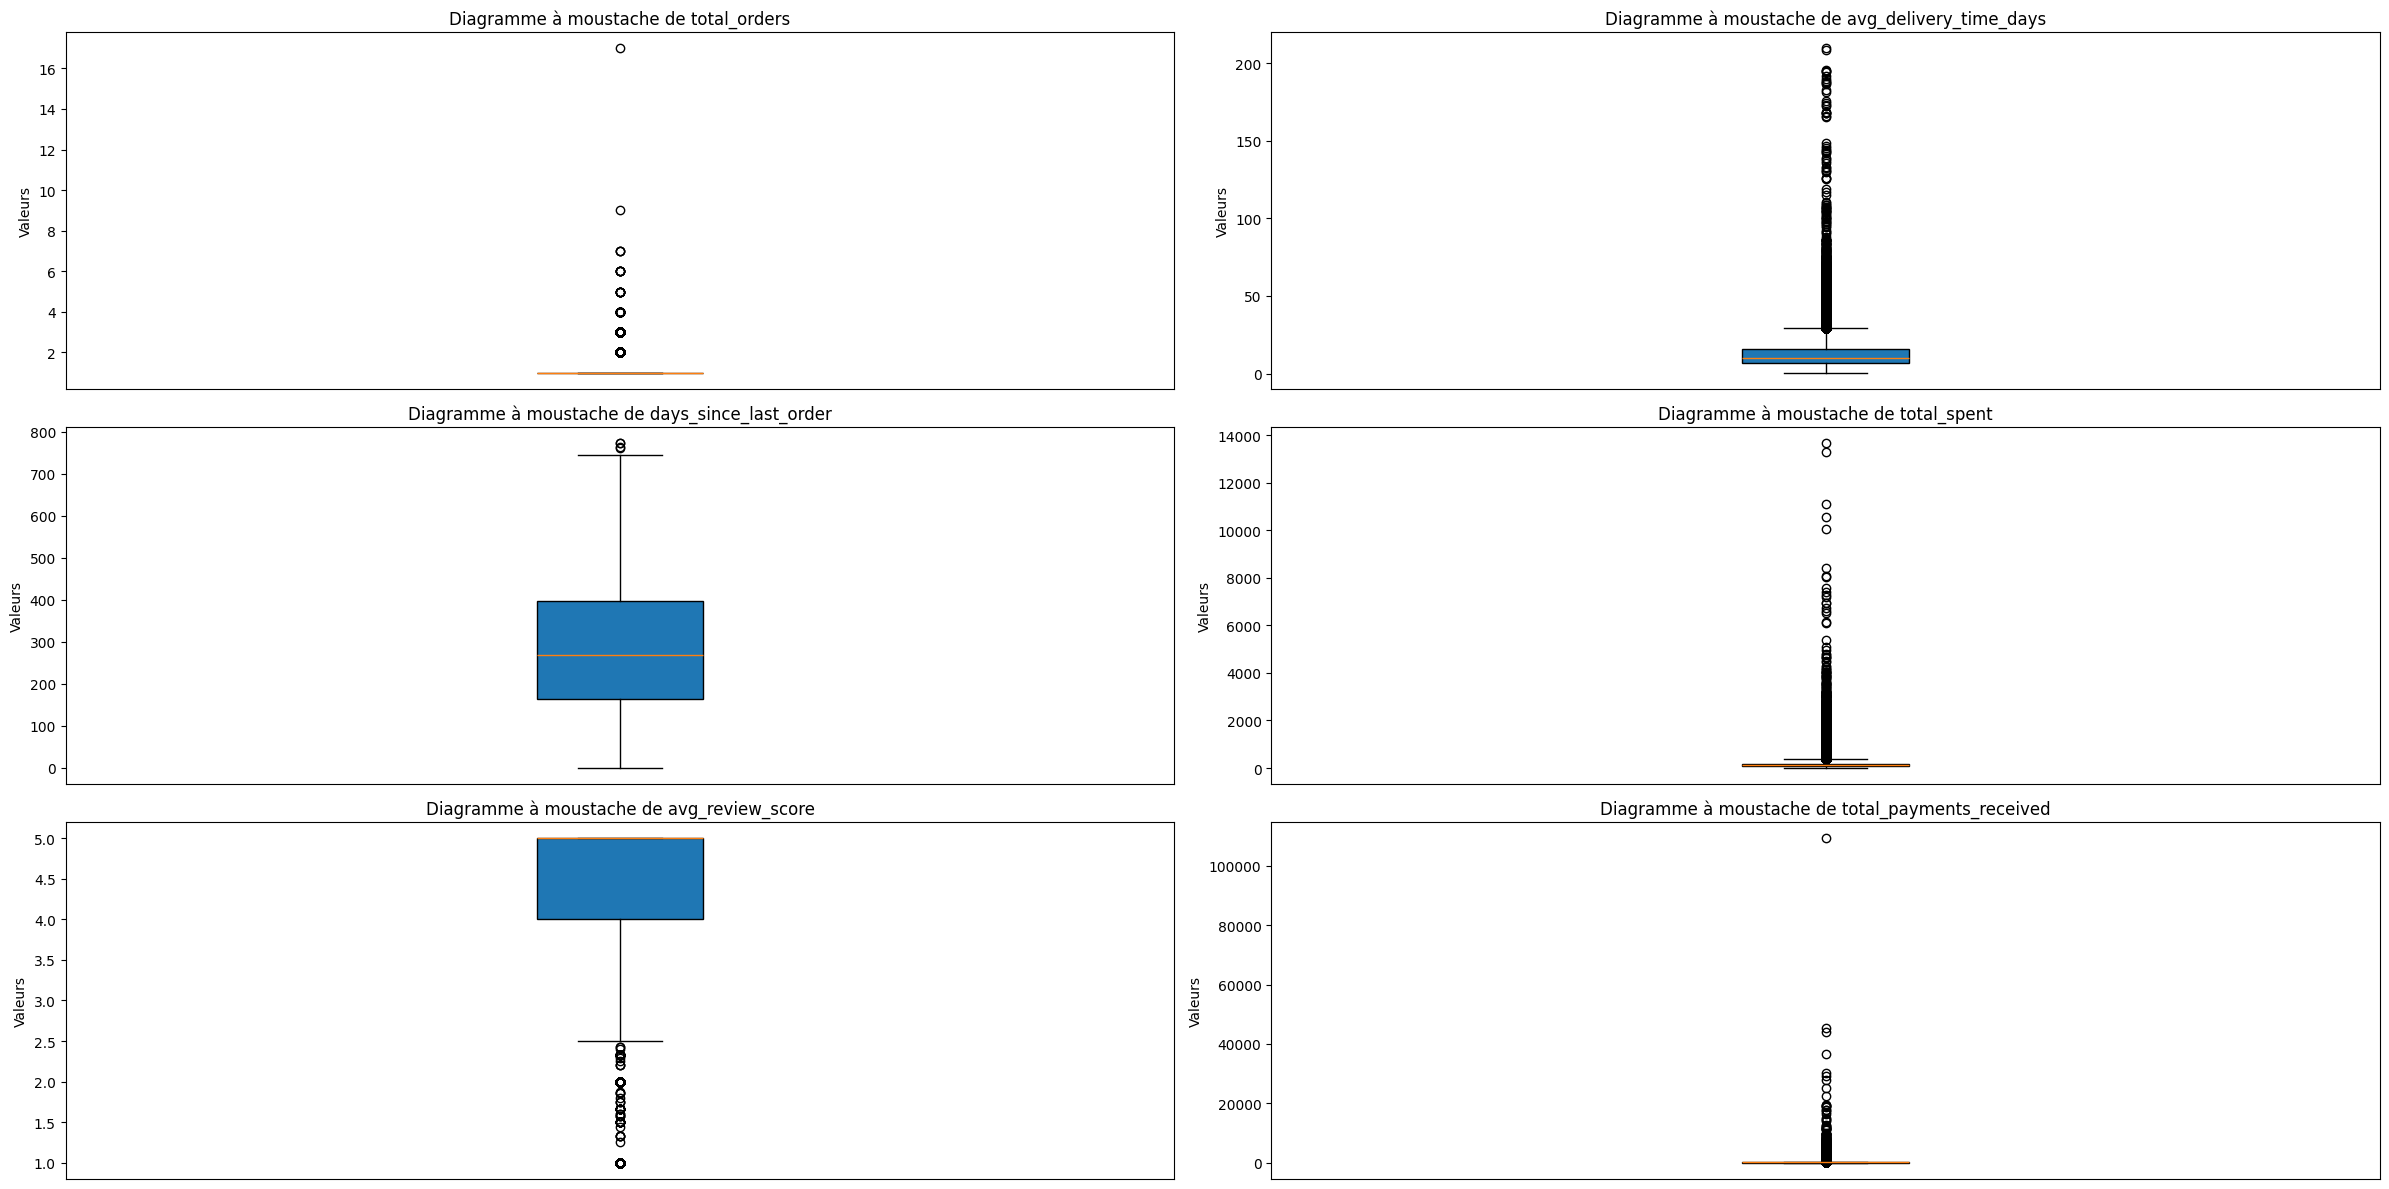

In [11]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'total_payments_received']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


In [12]:
# Créer un dataframe ne contenant que les colonnes de type number
df_num = df.select_dtypes(include=['number'])

In [13]:
correlation_matrix = df_num.corr()

# write correlation matrix to file
correlation_matrix.to_csv('data/correlation_matrix.csv')

print(correlation_matrix)

                         total_orders  avg_delivery_time_days  \
total_orders                 1.000000               -0.006260   
avg_delivery_time_days      -0.006260                1.000000   
days_since_last_order       -0.024855                0.099995   
total_spent                  0.124879                0.063089   
avg_review_score             0.004984               -0.334850   
total_payments_received      0.083613                0.027572   

                         days_since_last_order  total_spent  avg_review_score  \
total_orders                         -0.024855     0.124879          0.004984   
avg_delivery_time_days                0.099995     0.063089         -0.334850   
days_since_last_order                 1.000000     0.004051         -0.026141   
total_spent                           0.004051     1.000000         -0.042607   
avg_review_score                     -0.026141    -0.042607          1.000000   
total_payments_received              -0.002587     0.58801

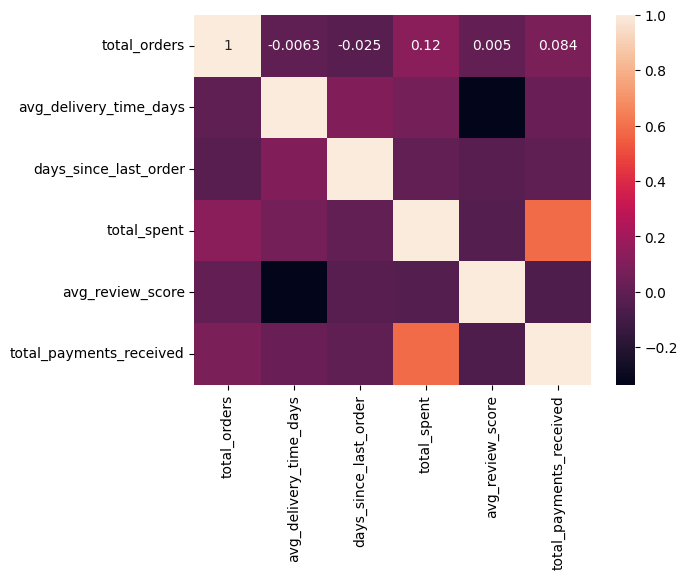

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Analyse des colonnes contenant des valeurs autres que des numbers

In [15]:
# create a dataframe with columns which are not number type
df_not_num = df.select_dtypes(exclude=['number'])

In [16]:
df_not_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  96096 non-null  object
 1   last_order_date     96096 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [17]:
df_not_num.sample(5)

,customer_unique_id,last_order_date
47918,7f5ee568f55fc408e0002d49a99836b5,2018-01-13 10:28:16
45386,78bbad9dd07b52cf3c8600ec1cc1510c,2017-04-19 18:25:19
34372,5b2f88631e76ec357578704f3a123737,2017-10-26 11:22:23
86013,e4e6876cca9888203156816a0e2a7523,2018-03-02 23:51:51
41603,6e896394a8caa8730dfc4db1d8de3e10,2017-01-30 17:00:09


## Génération du fichier csv clean pour les modèles de machine learning.

In [ ]:
# write the resulting dataframe to a csv file
df.to_csv('data/clean.csv', index=False)